# Dataset de severidade

In [1]:
import pandas as pd

df = pd.read_csv("Data/severity.csv")
df[(df["date"] < "2008-02-19") & (df["severity_acc"] > 0)]

,Unnamed: 0,occurrence_id,planting_relative_day,date,severity_acc
902980,902980,9412,0,2008-01-01,4.8666
902981,902981,9412,1,2008-01-02,17.6718
902982,902982,9412,2,2008-01-03,21.8294
902983,902983,9412,3,2008-01-04,25.2626
902984,902984,9412,4,2008-01-05,30.9144
...,...,...,...,...,...
1529021,1529021,364,297,2005-07-17,710.5557
1529022,1529022,364,298,2005-07-18,710.5557
1529023,1529023,364,299,2005-07-19,710.5557
1529024,1529024,364,300,2005-07-20,710.5557


# Dataset de features para instâncias de Ferrugem Asiática da Soja

In [2]:
!pip install matplotlib

In [3]:
from datetime import datetime

current_datetime_gen = datetime.now().strftime("%Y-%m-%d %H:%M")
current_datetime_gen

'2024-05-12 23:06'

In [4]:
import pandas as pd


instances_df = pd.read_csv("Data/instances_all.csv", sep=",", parse_dates=["data_ocorrencia", "planting_start_date"])
instances_features_df = pd.read_csv("Data/features_all.csv", sep=",", parse_dates=["data_ocorrencia", "planting_start_date"])

## Instâncias por safra

==> Total: 5063 <==


<Axes: title={'center': 'Dataset: Instâncias de ocorrência por ano >2024-05-12 23:06<'}, ylabel='safra'>

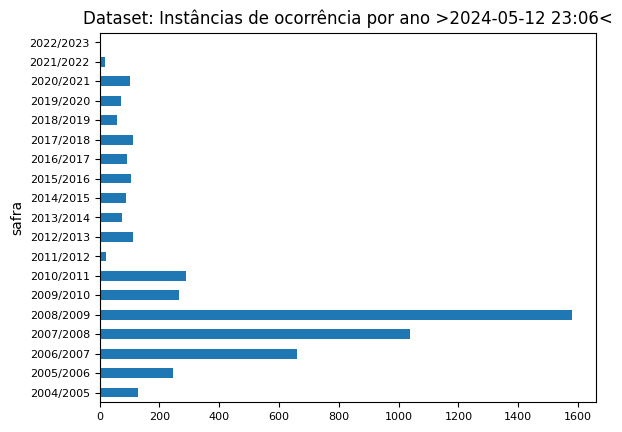

In [5]:
instances_per_year_df = instances_df[instances_df["data_ocorrencia"].notnull()]
instances_per_year_df = instances_per_year_df.groupby("safra")["safra"].count()

print(f"==> Total: {instances_df.shape[0]} <==")
instances_per_year_df.plot(y="safra", kind="barh", fontsize=8, title=f"Dataset: Instâncias de ocorrência por ano >{current_datetime_gen}<")

0     104
1     104
2     116
3     134
4     134
5     116
6     134
7     104
8     134
9     104
10    116
11    116
12    116
13    104
14    116
15    116
16    116
17    116
18     68
Name: planting_relative_day, dtype: int64


<Axes: title={'center': "Maior 'dia relativo do plantio' de ocorrência das instâncias, por safra >2024-05-12 23:06<"}>

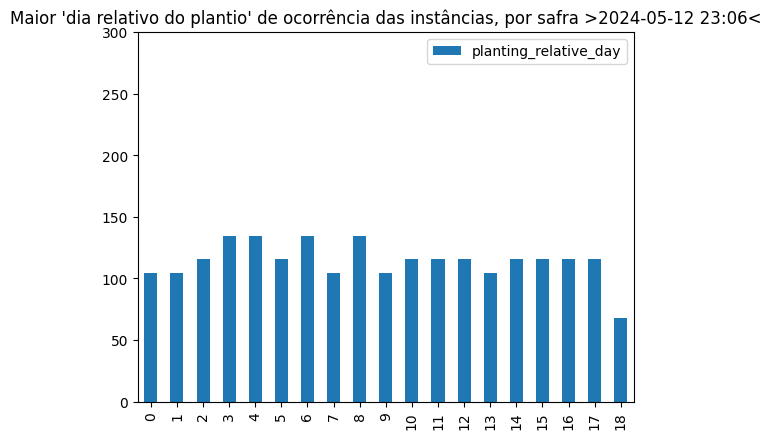

In [6]:
instances_per_year_df = instances_df.copy()
instances_per_year_df["planting_relative_day"] = instances_per_year_df["data_ocorrencia"] - instances_per_year_df["planting_start_date"]

relative_day_harvest = instances_per_year_df.groupby("safra", as_index=False)["planting_relative_day"].max()
relative_day_harvest['planting_relative_day'] = relative_day_harvest['planting_relative_day'].dt.days

# Colocar safra no eixo x
print(relative_day_harvest['planting_relative_day'])
relative_day_harvest.plot(y="planting_relative_day", kind="bar", ylim=(0, 300), title=f"Maior 'dia relativo do plantio' de ocorrência das instâncias, por safra >{current_datetime_gen}<")

## Features

## Dia relativo na safra (ocorrência)

<Axes: title={'center': "Valor 'dia relativo no plantio' no dataset de features >2024-05-12 23:06<"}, xlabel='safra'>

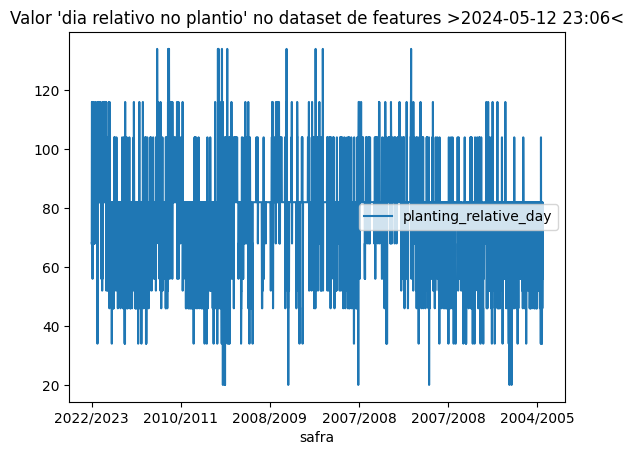

In [7]:
instances_features_df.plot(y="planting_relative_day", x="safra", kind="line", title=f"Valor 'dia relativo no plantio' no dataset de features >{current_datetime_gen}<")

<Axes: title={'center': "Valor 'dia relativo no plantio' no dataset de features >2024-05-12 23:06<"}, ylabel='Frequency'>

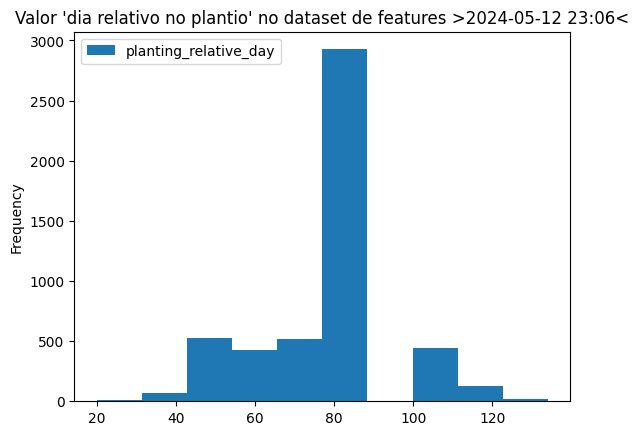

In [8]:
instances_features_df.plot(y="planting_relative_day", kind="hist", title=f"Valor 'dia relativo no plantio' no dataset de features >{current_datetime_gen}<")


# Resultados: Modelo de referência do estado da arte (BASELINE)

### test_severity_model_results.csv
Instâncias usadas no teste (10%) com resultados para determinar os resultados de erro

### day_in_planting
Dia relativo da ocorrência da ferrugem (reportada) no plantio, a partir da data de inicio da safra. Anteriormente, era usado o day_in_harvest (dia relativo na safra), mas é mais preciso usar relativo à data de início de plantio de cada ocorrência.

### day_in_planting_5d, day_in_planting_10d, day_in_planting_15d
Dia **previsto** usando o limiar de 5, 10 ou 15 dias antes do dia relativo da ocorrência

### threshold_5d, threshold_10d, threshold_15d
Limiar calculado a partir da **média de severidade acumulada** em 5, 10 ou 15 dias antes da data de ocorrência atual. Calculado com o dataset de treino (restante 90% do dataset).

In [9]:
# Instâncias de teste com resultados, para todas as safras
all_harvests_result_df = pd.read_csv("Data/concorrente_results_all.csv", sep=",")

print(f"line count: {all_harvests_result_df.shape[0]}")
all_harvests_result_df.head(10)

line count: 5060


,Unnamed: 0,index,ocorrencia_id,segment_id_precipitation,planting_start_date,planting_relative_day,threshold_5d,severity_acc_5d,predicted_planting_relative_day_5d,threshold_10d,severity_acc_10d,predicted_planting_relative_day_10d,threshold_15d,severity_acc_15d,predicted_planting_relative_day_15d,fold
0,0,1917,9257,1644.0,2008-12-26,68,251.581469,251.1741,59,232.326172,227.7823,58,212.619375,209.6727,58,1
1,1,3567,6174,1204.0,2007-11-22,82,251.581469,241.7865,99,232.326172,230.1209,96,212.619375,205.8842,85,1
2,2,3224,6890,1291.0,2007-12-08,82,251.581469,249.3386,84,232.326172,229.7805,76,212.619375,204.7665,75,1
3,3,5041,62,1995.0,2004-11-19,46,251.581469,251.4346,218,232.326172,231.9971,203,212.619375,209.7371,201,1
4,4,4014,5021,1707.0,2007-11-04,46,251.581469,238.4588,90,232.326172,217.5118,86,212.619375,206.0649,90,1
5,5,843,13469,573.0,2011-11-13,82,251.581469,249.6712,140,232.326172,230.5352,140,212.619375,211.6487,122,1
6,6,4416,2595,1835.0,2006-10-22,82,251.581469,249.6793,81,232.326172,225.4802,83,212.619375,202.6470,79,1
7,7,2900,7516,1644.0,2008-11-20,68,251.581469,249.1517,81,232.326172,231.2305,85,212.619375,207.5973,85,1
8,8,108,17939,1996.0,2020-11-17,56,251.581469,231.5616,39,232.326172,231.5616,44,212.619375,208.5473,46,1
9,9,4840,1020,2558.0,2005-11-25,46,251.581469,248.8041,87,232.326172,228.2723,87,212.619375,202.9789,89,1


<Axes: title={'center': "Distribuição de 'dia relativo do plantio' ocorrido (baseline) >2024-05-12 23:06<"}, ylabel='Frequency'>

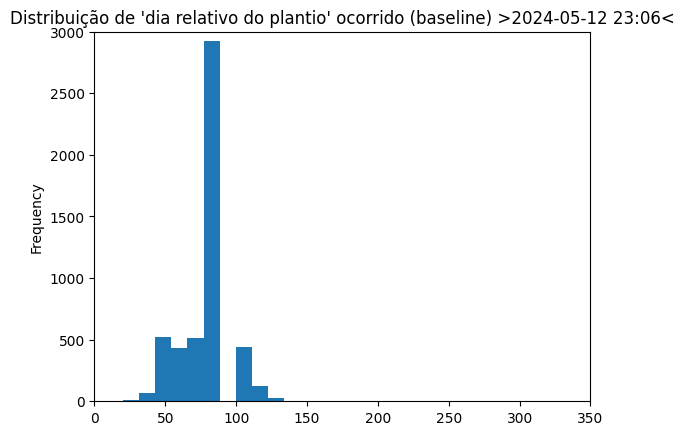

In [10]:
all_harvests_result_df["planting_relative_day"].plot(kind="hist", xlim=(0, 350), ylim=(0, 3000), title=f"Distribuição de 'dia relativo do plantio' ocorrido (baseline) >{current_datetime_gen}<")


<Axes: title={'center': "Distribuição de 'dia relativo do plantio' previsto (baseline) >2024-05-12 23:06<"}, ylabel='Frequency'>

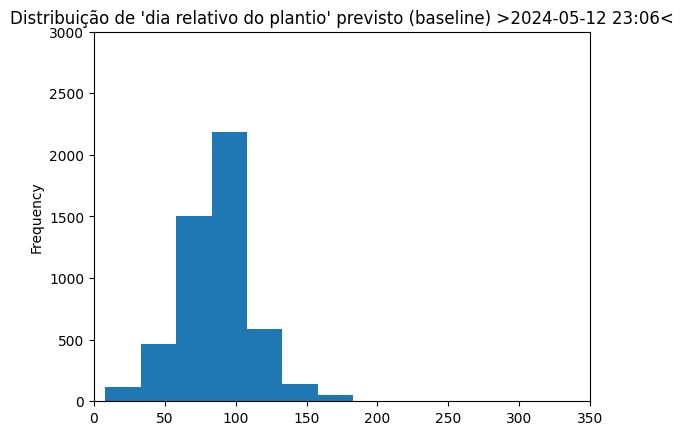

In [11]:
all_harvests_result_df["predicted_planting_relative_day_5d"].plot(kind="hist", xlim=(0, 350), ylim=(0, 3000), title=f"Distribuição de 'dia relativo do plantio' previsto (baseline) >{current_datetime_gen}<")

## Erro para todas as safras

In [12]:
# Talvez seja necessário ajustar para considerar os folds!
# TODO: Verificar o porquê dos erros estarem errados muito errados para cima aqui!

import math

df = all_harvests_result_df

# calculating average accuracy for 5d, 10d and 15d
df['distance_5d'] = pow(df['predicted_planting_relative_day_5d'] - df['planting_relative_day'], 2)
df['distance_10d'] = pow(df['predicted_planting_relative_day_10d'] - df['planting_relative_day'], 2)
df['distance_15d'] = pow(df['predicted_planting_relative_day_15d'] - df['planting_relative_day'], 2)

error_rmse = {
    'error_5d': math.sqrt(df['distance_5d'].sum() / df.shape[0]),
    'error_10d': math.sqrt(df['distance_10d'].sum() / df.shape[0]),
    'error_15d': math.sqrt(df['distance_15d'].sum() / df.shape[0]),
}
best_error_rmse = min(error_rmse, key=error_rmse.get)

print(f"======> Average error for 5d: {error_rmse['error_5d']}")
print(f"======> Average error for 10d: {error_rmse['error_10d']}")
print(f"======> Average error for 15d: {error_rmse['error_15d']}")
print()
print(f"======> BEST average error: {best_error_rmse} ({round(error_rmse[best_error_rmse], 2)})")

# error_df = pd.DataFrame(
#     {
#         "error_type": ["error_5d", "error_10d", "error_15d"],
#         "value": [error_rmse['error_5d'], error_rmse['error_10d'], error_rmse['error_15d']],
#     }
# )


======> Average error for 5d: 31.51413510573391
======> Average error for 10d: 29.569383134795558
======> Average error for 15d: 27.49952209430229

======> BEST average error: error_15d (27.5)


[Text(0, 0, '31.5141')]

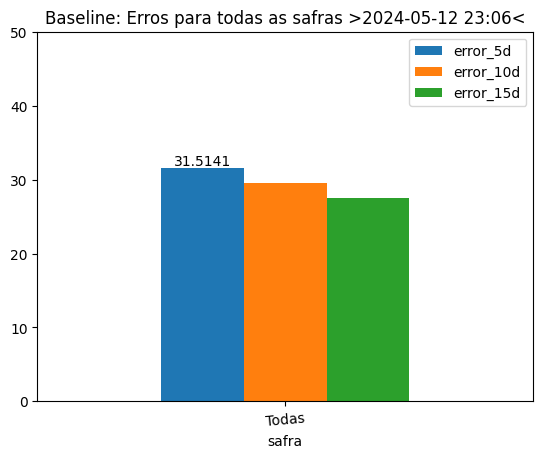

In [13]:
error_df = pd.DataFrame([{
        "safra": "Todas",
        "error_5d": error_rmse['error_5d'],
        "error_10d": error_rmse['error_10d'],
        "error_15d": error_rmse['error_15d'],
    }])

ax = error_df.plot(x="safra", y=["error_5d", "error_10d", "error_15d"], ylim=(0, 50), kind="bar", rot=5, fontsize=10, title=f"Baseline: Erros para todas as safras >{current_datetime_gen}<")
ax.bar_label(ax.containers[0])

## Erros para cada safra

In [14]:
each_harvest_result_df = pd.read_csv("Data/concorrente_results_harvest_all.csv")

each_harvest_result_df.head()

,Unnamed: 0,index,ocorrencia_id,segment_id_precipitation,planting_start_date,planting_relative_day,threshold_5d,severity_acc_5d,predicted_planting_relative_day_5d,threshold_10d,severity_acc_10d,predicted_planting_relative_day_10d,threshold_15d,severity_acc_15d,predicted_planting_relative_day_15d,safra,fold
0,0,18,18456,2154.0,2021-10-02,82,461.036100,453.8726,99,430.865520,429.3343,99,403.825887,402.0948,92,2021/2022,1
1,1,6,18673,1082.0,2021-12-16,82,461.036100,459.7706,89,430.865520,429.8599,88,403.825887,396.3725,87,2021/2022,1
2,2,7,18648,1016.0,2021-11-16,104,461.036100,460.5571,92,430.865520,424.9265,90,403.825887,386.4435,89,2021/2022,1
3,0,5,18674,1502.0,2021-12-17,82,475.785473,472.4176,92,443.648013,429.2260,94,417.320647,397.4131,98,2021/2022,2
4,1,9,18545,1016.0,2021-11-24,82,475.785473,466.4720,96,443.648013,441.1188,97,417.320647,415.5998,89,2021/2022,2


In [15]:
safras = each_harvest_result_df["safra"].unique()

print(safras)

['2021/2022' '2020/2021' '2019/2020' '2018/2019' '2017/2018' '2016/2017'
 '2015/2016' '2014/2015' '2013/2014' '2012/2013' '2011/2012' '2010/2011'
 '2009/2010' '2008/2009' '2007/2008' '2006/2007' '2005/2006' '2004/2005']


In [16]:
K_FOLDS = 5

each_harvest_fold_error_list = []

for safra in safras:
    for k_num in range(1, K_FOLDS + 1):
        df = each_harvest_result_df.copy()
        df = df[df["safra"] == safra]
        df = df[df["fold"] == k_num]
        
        # calculating average accuracy for 5d, 10d and 15d
        df['distance_5d'] = pow(df['predicted_planting_relative_day_5d'] - df['planting_relative_day'], 2)
        df['distance_10d'] = pow(df['predicted_planting_relative_day_10d'] - df['planting_relative_day'], 2)
        df['distance_15d'] = pow(df['predicted_planting_relative_day_15d'] - df['planting_relative_day'], 2)
        
        error_rmse = {
            'error_5d': math.sqrt(df['distance_5d'].sum() / df.shape[0]),
            'error_10d': math.sqrt(df['distance_10d'].sum() / df.shape[0]),
            'error_15d': math.sqrt(df['distance_15d'].sum() / df.shape[0]),
        }
        best_error_rmse = min(error_rmse, key=error_rmse.get)
        best_error_rmse_value = round(error_rmse[best_error_rmse], 2)
    
        # print(f"=====> Safra: {safra}")
        # print(f"=====> Fold: {k_num}")
        # print(f"=====> Average error for 5d: {error_rmse['error_5d']}")
        # print(f"=====> Average error for 10d: {error_rmse['error_10d']}")
        # print(f"=====> Average error for 15d: {error_rmse['error_15d']}")
        # print(f"=====> BEST average error: {best_error_rmse} ({best_error_rmse_value})")
        # print()
    
        each_harvest_fold_error_list.append({
            "safra": safra,
            "fold": k_num,
            "error_5d": error_rmse['error_5d'],
            "error_10d": error_rmse['error_10d'],
            "error_15d": error_rmse['error_15d'],
            "error_lowest": best_error_rmse,
            "error_lowest_value": best_error_rmse_value,
        })

In [17]:
each_harvest_fold_error_df = pd.DataFrame(each_harvest_fold_error_list)

each_harvest_fold_error_df.head(20)

,safra,fold,error_5d,error_10d,error_15d,error_lowest,error_lowest_value
0,2021/2022,1,12.675436,13.178265,10.801234,error_15d,10.80
1,2021/2022,2,19.966639,21.055482,20.041623,error_5d,19.97
2,2021/2022,3,18.421003,16.822604,15.758596,error_15d,15.76
3,2021/2022,4,28.035692,23.079572,24.906492,error_10d,23.08
4,2021/2022,5,19.373521,19.672316,18.806027,error_15d,18.81
5,2020/2021,1,20.262033,19.452506,17.877360,error_15d,17.88
6,2020/2021,2,22.195720,19.168985,17.375270,error_15d,17.38
7,2020/2021,3,15.959323,15.927963,15.708278,error_15d,15.71
8,2020/2021,4,15.822452,15.357409,14.688431,error_15d,14.69
9,2020/2021,5,12.849124,12.014574,12.457929,error_10d,12.01


In [18]:
df = each_harvest_fold_error_df.copy()
df = df[["safra", "error_5d", "error_10d", "error_15d"]].groupby("safra", as_index=False).mean()
df["error_lowest_value"] = df[["error_5d", "error_10d", "error_15d"]].min(axis=1)

each_harvest_error_df = df
each_harvest_error_df.head(40)

,safra,error_5d,error_10d,error_15d,error_lowest_value
0,2004/2005,27.610384,25.324793,23.454676,23.454676
1,2005/2006,23.557499,23.275754,22.959270,22.959270
2,2006/2007,15.444395,14.764398,13.984352,13.984352
3,2007/2008,20.554695,20.209705,19.555461,19.555461
4,2008/2009,24.852861,22.587254,21.535656,21.535656
5,2009/2010,23.460268,23.247092,22.026758,22.026758
6,2010/2011,20.475578,20.173877,20.151220,20.151220
7,2011/2012,23.796323,23.779375,22.529657,22.529657
8,2012/2013,17.537555,17.381378,16.801153,16.801153
9,2013/2014,13.181220,13.363982,13.733761,13.181220


<Axes: title={'center': 'Baseline: Erros para cada safra >2024-05-12 23:06<'}, xlabel='safra'>

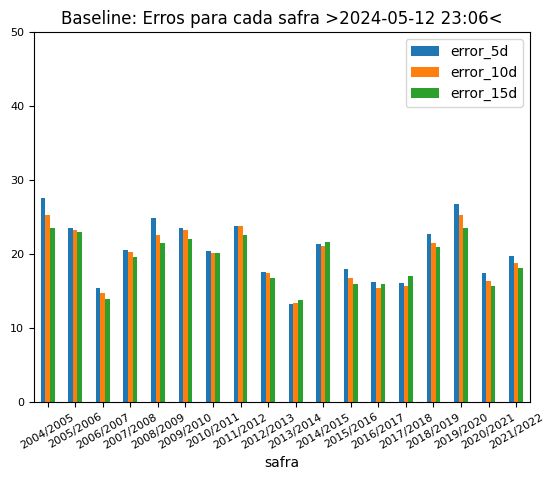

In [19]:
title = f"Baseline: Erros para cada safra >{current_datetime_gen}<"
each_harvest_error_df.plot(x="safra", y=["error_5d", "error_10d", "error_15d"], ylim=(0, 50), kind="bar", rot=30, fontsize=8, title=title)


<Axes: title={'center': 'Baseline: Menores erros por safra >2024-05-12 23:06<'}, xlabel='safra'>

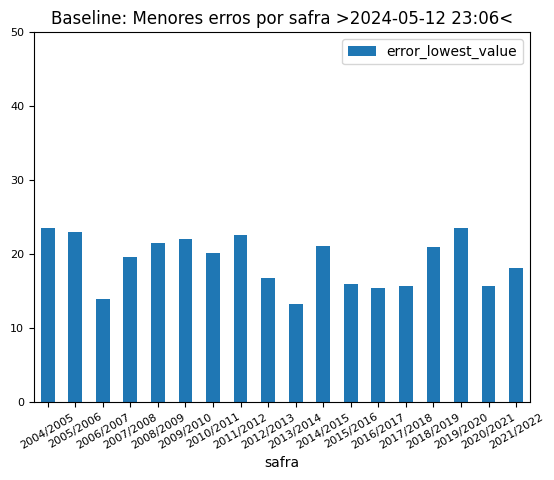

In [20]:
each_harvest_error_df.plot(x="safra", y="error_lowest_value", ylim=(0, 50), kind="bar", rot=30, fontsize=8, title=f"Baseline: Menores erros por safra >{current_datetime_gen}<")

# Resultados: Modelo competidor (Aprendizado de Máquina)

## Erro para todas as safras

In [21]:
train_test_results_df = pd.read_csv("Data/proposta_results_all.csv")

train_test_results_df.head(40)

,Unnamed: 0,index,planting_relative_day,safra,predicted_planting_relative_day,distance,fold
0,0,0,116,NaN,80.680,35.320,1
1,1,7,82,NaN,99.600,17.600,1
2,2,15,82,NaN,71.620,10.380,1
3,3,29,68,NaN,69.720,1.720,1
4,4,37,82,NaN,79.640,2.360,1
5,5,43,116,NaN,97.680,18.320,1
6,6,47,82,NaN,78.260,3.740,1
7,7,48,82,NaN,79.980,2.020,1
8,8,51,82,NaN,79.440,2.560,1
9,9,56,82,NaN,81.240,0.760,1


<Axes: title={'center': "Distribuição de 'dia relativo da safra' ocorrido (ML) >2024-05-12 23:06<"}, ylabel='Frequency'>

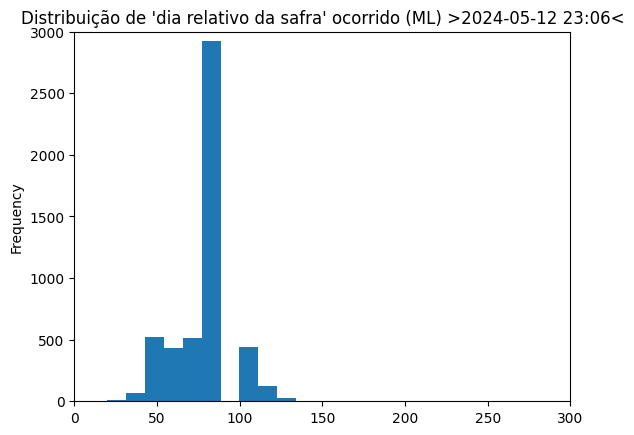

In [22]:
train_test_results_df["planting_relative_day"].plot(kind="hist", xlim=(0, 300), ylim=(0, 3000), title=f"Distribuição de 'dia relativo da safra' ocorrido (ML) >{current_datetime_gen}<")

<Axes: title={'center': "Distribuição de 'dia relativo da safra' predito (ML) >2024-05-12 23:06<"}, ylabel='Frequency'>

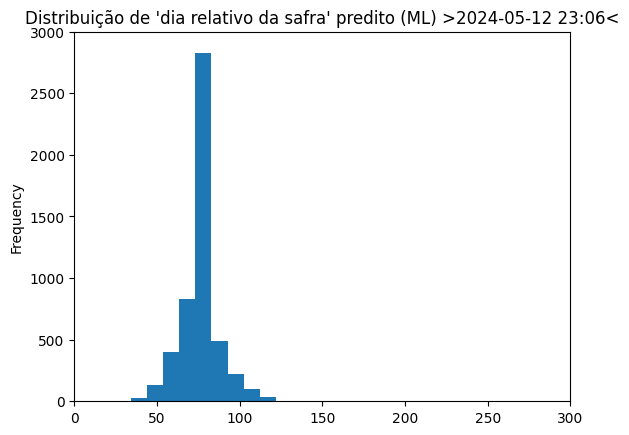

In [23]:
train_test_results_df["predicted_planting_relative_day"].plot(kind="hist", xlim=(0, 300), ylim=(0, 3000), title=f"Distribuição de 'dia relativo da safra' predito (ML) >{current_datetime_gen}<")

In [24]:
K_FOLDS = 5

each_fold_error_list = []


for k_num in range(1, K_FOLDS + 1):
    df = train_test_results_df.copy()
    df = df[df["fold"] == k_num]
    
    df['distance_pow2'] = pow(df['predicted_planting_relative_day'] - df['planting_relative_day'], 2)
    
    error_rmse = {
        'error': math.sqrt(df['distance_pow2'].sum() / df.shape[0]),
    }

    print(f"=====> Fold: {k_num}")
    print(f"=====> Average error: {error_rmse['error']}")
    print()

    each_fold_error_list.append({
        "fold": k_num,
        "error": error_rmse['error'],
    })

each_fold_error_list

=====> Fold: 1
=====> Average error: 12.050209486598177

=====> Fold: 2
=====> Average error: 12.019646027727314

=====> Fold: 3
=====> Average error: 11.965864598743348

=====> Fold: 4
=====> Average error: 11.906975781316103

=====> Fold: 5
=====> Average error: 12.208418090720066



[{'fold': 1, 'error': 12.050209486598177},
 {'fold': 2, 'error': 12.019646027727314},
 {'fold': 3, 'error': 11.965864598743348},
 {'fold': 4, 'error': 11.906975781316103},
 {'fold': 5, 'error': 12.208418090720066}]

Erro para todas as safras: 12.030222797021


[Text(0, 0, '12.0302')]

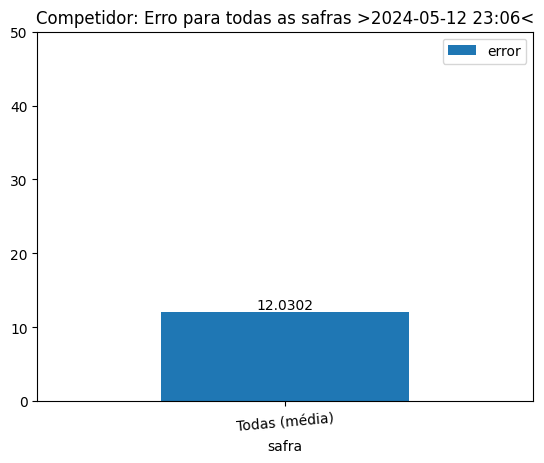

In [25]:
each_fold_error_df = pd.DataFrame(each_fold_error_list)

error = each_fold_error_df["error"].mean()
error_df = pd.DataFrame([{
    "safra": "Todas (média)",
    "error": error,
}])

print(f"Erro para todas as safras: {error}")

ax = error_df.plot(x="safra", y="error", kind="bar", ylim=(0, 50), rot=5, fontsize=10, title=f"Competidor: Erro para todas as safras >{current_datetime_gen}<")
ax.bar_label(ax.containers[0])


## Erros para cada safra

In [26]:
train_test_results_safra_df = pd.read_csv("Data/proposta_results_harvest_all.csv")
safras = train_test_results_safra_df["safra"].unique()

print(safras)
train_test_results_safra_df.head()

['2021/2022' '2020/2021' '2019/2020' '2018/2019' '2017/2018' '2016/2017'
 '2015/2016' '2014/2015' '2013/2014' '2012/2013' '2011/2012' '2010/2011'
 '2009/2010' '2008/2009' '2007/2008' '2006/2007' '2005/2006' '2004/2005']


,Unnamed: 0,index,planting_relative_day,safra,predicted_planting_relative_day,distance,fold
0,0,6,104,2021/2022,101.18,2.82,1
1,1,8,56,2021/2022,94.20,38.20,1
2,2,10,104,2021/2022,103.84,0.16,1
3,3,17,82,2021/2022,88.48,6.48,1
4,0,4,82,2021/2022,81.34,0.66,2


In [27]:
K_FOLDS = 5

each_safra_fold_error_list = []

for safra in safras:
    for k_num in range(1, K_FOLDS + 1):
        df = train_test_results_safra_df.copy()
        df = df[df["fold"] == k_num]
        df = df[df["safra"] == safra]
        
        # calculating average accuracy for 5d, 10d and 15d
        df['distance_pow2'] = pow(df['predicted_planting_relative_day'] - df['planting_relative_day'], 2)
        
        error_rmse = {
            'error': math.sqrt(df['distance_pow2'].sum() / df.shape[0]),
        }
    
        print(f"=====> Fold: {k_num}")
        print(f"=====> Average error: {error_rmse['error']}")
        print()
    
        each_safra_fold_error_list.append({
            "safra": safra,
            "fold": k_num,
            "error": error_rmse['error'],
        })

each_safra_fold_error_df = pd.DataFrame(each_safra_fold_error_list)
each_safra_fold_error_df

=====> Fold: 1
=====> Average error: 19.424265751888797

=====> Fold: 2
=====> Average error: 15.194268656305901

=====> Fold: 3
=====> Average error: 20.83158419323888

=====> Fold: 4
=====> Average error: 14.415181811779778

=====> Fold: 5
=====> Average error: 14.93147012186007

=====> Fold: 1
=====> Average error: 12.312889993823543

=====> Fold: 2
=====> Average error: 15.592911851222658

=====> Fold: 3
=====> Average error: 9.889428699373893

=====> Fold: 4
=====> Average error: 8.243068603378235

=====> Fold: 5
=====> Average error: 14.382674994589845

=====> Fold: 1
=====> Average error: 19.18410105616975

=====> Fold: 2
=====> Average error: 18.074305361084125

=====> Fold: 3
=====> Average error: 19.813234393779755

=====> Fold: 4
=====> Average error: 15.135314428750492

=====> Fold: 5
=====> Average error: 16.258701406587534

=====> Fold: 1
=====> Average error: 18.67255561869701

=====> Fold: 2
=====> Average error: 20.42305641507493

=====> Fold: 3
=====> Average error: 2

,safra,fold,error
0,2021/2022,1,19.424266
1,2021/2022,2,15.194269
2,2021/2022,3,20.831584
3,2021/2022,4,14.415182
4,2021/2022,5,14.931470
...,...,...,...
85,2004/2005,1,13.936523
86,2004/2005,2,12.525772
87,2004/2005,3,11.094469
88,2004/2005,4,6.267635


In [28]:
df = each_safra_fold_error_df.copy()
df = df[["safra", "error"]].groupby("safra", as_index=False).mean()

each_safra_fold_error_df = df
each_safra_fold_error_df.head(40)

,safra,error
0,2004/2005,11.909892
1,2005/2006,11.139240
2,2006/2007,10.193179
3,2007/2008,11.477979
4,2008/2009,10.798637
5,2009/2010,11.700227
6,2010/2011,14.846802
7,2011/2012,16.218633
8,2012/2013,11.562122
9,2013/2014,10.054978


<Axes: title={'center': 'Competidor: Erros para cada safra >2024-05-12 23:06<'}, xlabel='safra'>

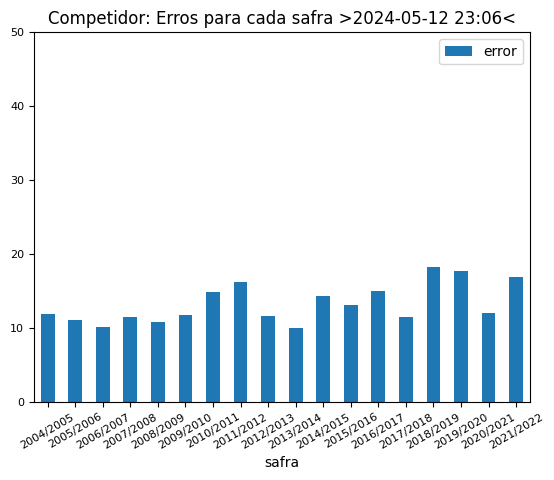

In [29]:
each_safra_fold_error_df.plot(x="safra", y="error", ylim=(0, 50), kind="bar", rot=30, fontsize=8, title=f"Competidor: Erros para cada safra >{current_datetime_gen}<")